In [1]:
import numpy as np

# -------------------------------
# 1. Explicit dataset
# -------------------------------
# Each row in X is [Sweetness, Crunchiness]
X = np.array([
    [0, 2.3], [1, 3], [2, 4], [2.4, 5.3], [1, 4], [2, 5],
    [3, 0],   [4, 0], [3, 1], [4, 2],     [5, 1], [5, 2]
])

# Labels: 1 for Apples, -1 for Oranges
y = np.array([
    1, 1, 1, 1, 1, 1, # Apples
    0, 0, 0, 0, 0, 0  # Oranges
])

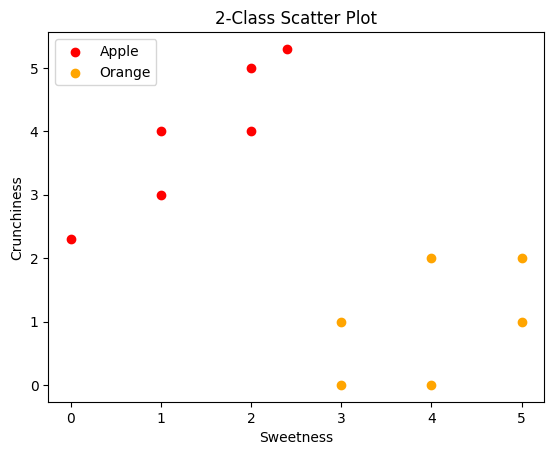

In [2]:
import matplotlib.pyplot as plt
# -------------------------------
# 2. Plot dataset
# -------------------------------
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Apple')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='orange', label='Orange')
plt.xlabel("Sweetness")
plt.ylabel("Crunchiness")
plt.legend(loc = 'upper left')
plt.title("2-Class Scatter Plot")
plt.show()


In [ ]:
from sklearn import svm
# -------------------------------
# 3. Fit the SVM
# -------------------------------
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# -------------------------------
# 4. Extract decision boundary
# -------------------------------
w = clf.coef_[0]
b = clf.intercept_[0]

w0 = w[0]
w1 = w[1]

print("w0:", w0)
print("w1:", w1)
print("b:", b)
print("Support Vectors:\n", clf.support_vectors_)

# The SVM learns the following decision boundary based on the 2 features
# f1 (Sweetness) and f2 (Crunchiness)
# w0*f1 + w1*f2 + b = 0
#
# Intuitively, a good separation is achieved by the boundary that has the largest distance
# to the nearest training data points of any class ("margin"). In general the larger the
# margin the lower the generalization error of the classifier.
# 
# The margin lines are given by:
# w0*f1 + w1*f2 + b = +1
# w0*f1 + w1*f2 + b = -1
# and the support vectors (data points) will fall exactly on these margins.

w0: -0.4999999999999997
w1: 0.5000000000000002
b: -1.4432899320127035e-15
Support Vectors:
 [[3. 1.]
 [4. 2.]
 [1. 3.]
 [2. 4.]]


In [ ]:
# Given an f1, we can compute f2 as follows:
# f2 = ((-w0*f1) - (b + offset) / w1
#
# Note that we can plot f2 against f1 (as shown above).
# offset = 0 gives the decision boundary,
# offset = 1 gives the upper margin, and
# offset = -1 gives the lower margin.
#
# Note that we can plot f2 against f1 (as shown above).
# and the support vectors (data points) will fall exactly on these margins.
def decision_line(x_vals, offset):
    return ((-w0 * x_vals) - (b + offset)) / w1

# create some f1 and f2 values
f1_vals = np.linspace(0, 5, 2)
f2_valsOnDecisionBoundary = decision_line(f1_vals, offset = 0)
f2_valsOnUpperMargin      = decision_line(f1_vals, offset = 1)
f2_valsOnLowerrMargin     = decision_line(f1_vals, offset = -1)

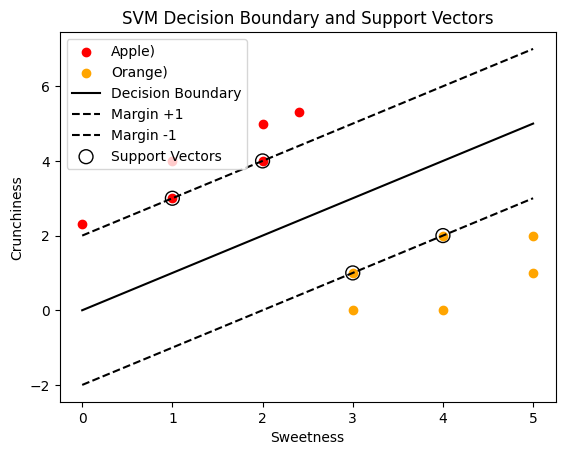

In [5]:
# -------------------------------
# 5. Visualize decision boundary
# -------------------------------
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Apple)')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='orange', label='Orange)')

# Decision boundary
plt.plot(f1_vals, f2_valsOnDecisionBoundary, 'k-', label='Decision Boundary')
# Margins
plt.plot(f1_vals, f2_valsOnUpperMargin, 'k--', label='Margin +1')
plt.plot(f1_vals, f2_valsOnLowerrMargin, 'k--', label='Margin -1')

# Support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel("Sweetness")
plt.ylabel("Crunchiness")
plt.legend(loc = 'upper left')
plt.title("SVM Decision Boundary and Support Vectors")
plt.show()